In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyproj

import rioxarray
import xarray as xr
import cartopy.crs as ccrs

import math
import geopandas as gpd

ModuleNotFoundError: No module named 'rioxarray'

In [ ]:
# https://unep-viewer.mercator-ocean.eu/product/SEAICE_GLO_SEAICE_L4_REP_OBSERVATIONS_011_009/services

In [ ]:
print(pyproj.pj_list)

{'adams_hemi': 'Adams Hemisphere in a Square', 'adams_ws1': 'Adams World in a Square I', 'adams_ws2': 'Adams World in a Square II', 'aea': 'Albers Equal Area', 'aeqd': 'Azimuthal Equidistant', 'affine': 'Affine transformation', 'airy': 'Airy', 'aitoff': 'Aitoff', 'alsk': 'Modified Stereographic of Alaska', 'apian': 'Apian Globular I', 'august': 'August Epicycloidal', 'axisswap': 'Axis ordering', 'bacon': 'Bacon Globular', 'bertin1953': 'Bertin 1953', 'bipc': 'Bipolar conic of western hemisphere', 'boggs': 'Boggs Eumorphic', 'bonne': 'Bonne (Werner lat_1=90)', 'calcofi': 'Cal Coop Ocean Fish Invest Lines/Stations', 'cart': 'Geodetic/cartesian conversions', 'cass': 'Cassini', 'cc': 'Central Cylindrical', 'ccon': 'Central Conic', 'cea': 'Equal Area Cylindrical', 'chamb': 'Chamberlin Trimetric', 'collg': 'Collignon', 'col_urban': 'Colombia Urban', 'comill': 'Compact Miller', 'crast': 'Craster Parabolic (Putnins P4)', 'defmodel': 'Deformation model', 'deformation': 'Kinematic grid shift', '

In [ ]:
rds = rioxarray.open_rasterio("NE2_LR_LC_SR_W.tif",decode_coords="all")

In [ ]:
rds

<xarray.DataArray (band: 3, y: 8100, x: 16200)>
[393660000 values with dtype=uint8]
Coordinates:
  * band         (band) int32 1 2 3
  * x            (x) float64 -180.0 -180.0 -179.9 -179.9 ... 179.9 180.0 180.0
  * y            (y) float64 89.99 89.97 89.94 89.92 ... -89.94 -89.97 -89.99
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_DATETIME:        2012:07:16 09:57:53
    TIFFTAG_RESOLUTIONUNIT:  2 (pixels/inch)
    TIFFTAG_SOFTWARE:        Adobe Photoshop CS5 Macintosh
    TIFFTAG_XRESOLUTION:     72
    TIFFTAG_YRESOLUTION:     72
    scale_factor:            1.0
    add_offset:              0.0

In [ ]:
rds = rds.coarsen(x=10).mean().coarsen(y=10).mean().astype(int)

In [ ]:
angle = 30

In [ ]:
rds = rds.where(rds.y > angle, drop=True)

In [ ]:
rds

<xarray.DataArray (band: 3, y: 270, x: 1620)>
array([[[106., 106., 105., ..., 106., 106., 106.],
        [104., 104., 104., ..., 104., 104., 104.],
        [110., 110., 110., ..., 110., 110., 110.],
        ...,
        [ 94.,  95.,  97., ...,  95.,  94.,  95.],
        [ 95.,  95.,  94., ...,  94.,  95.,  96.],
        [ 96.,  94.,  93., ...,  98.,  95.,  96.]],

       [[160., 160., 160., ..., 160., 160., 160.],
        [159., 159., 159., ..., 159., 159., 159.],
        [164., 164., 165., ..., 164., 164., 164.],
        ...,
        [145., 146., 149., ..., 147., 146., 147.],
        [147., 147., 145., ..., 146., 147., 148.],
        [148., 146., 145., ..., 150., 147., 148.]],

       [[199., 199., 199., ..., 199., 199., 199.],
        [199., 199., 199., ..., 199., 199., 199.],
        [204., 204., 204., ..., 203., 203., 204.],
        ...,
        [186., 187., 190., ..., 186., 186., 187.],
        [187., 188., 186., ..., 186., 187., 188.],
        [189., 188., 186., ..., 189., 188., 188.]]])
Coordinates:
  * band         (band) int32 1 2 3
  * x            (x) float64 -179.9 -179.7 -179.4 -179.2 ... 179.4 179.7 179.9
  * y            (y) float64 89.89 89.67 89.44 89.22 ... 30.78 30.56 30.33 30.11
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_DATETIME:        2012:07:16 09:57:53
    TIFFTAG_RESOLUTIONUNIT:  2 (pixels/inch)
    TIFFTAG_SOFTWARE:        Adobe Photoshop CS5 Macintosh
    TIFFTAG_XRESOLUTION:     72
    TIFFTAG_YRESOLUTION:     72
    scale_factor:            1.0
    add_offset:              0.0

In [ ]:
transform_proj = pyproj.Proj(proj="stere", lat_0=90, lat_ts=angle)
transform_proj = pyproj.Proj(proj="laea", lon_0=0, lat_0=90)

In [ ]:
# x-y rotation
def rotator(x,y,theta):
    theta = theta*math.pi/180
    x_d = x*math.cos(theta)-y*math.sin(theta)
    y_d = x*math.sin(theta)+y*math.cos(theta)
    return x_d,y_d

In [ ]:
# Create a meshgrid
xv, yv = np.meshgrid(rds["x"], rds['y'])

x2, y2 = transform_proj(xv, yv)

x2, y2 = rotator(x2, y2,90)

rds.coords['x2'] = (('y', 'x'), x2)
rds.coords['y2'] = (('y', 'x'), y2)

In [ ]:
# rds["band"==1].plot(x="x2",y="y2")

In [ ]:
# rds.mean(dim="band").plot(x="x2",y="y2")

In [ ]:
# https://stackoverflow.com/questions/14120222/matplotlib-imshow-with-irregular-spaced-data-points/14140554#14140554

import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

xs0 = rds.coords['x2'].values.flatten()
ys0 = rds.coords['y2'].values.flatten()
rs0 = rds.sel(band=1).values.flatten()
gs0 = rds.sel(band=2).values.flatten()
bs0 = rds.sel(band=3).values.flatten()

xs,ys = np.mgrid[xs0.min():xs0.max():(xs0.max()-xs0.min())/1000, 
                 ys0.min():ys0.max():(ys0.max()-ys0.min())/1000]

r_resampled = griddata((xs0, ys0), rs0, (xs, ys),method="nearest").astype(int)
g_resampled = griddata((xs0, ys0), gs0, (xs, ys),method="nearest").astype(int)
b_resampled = griddata((xs0, ys0), bs0, (xs, ys),method="nearest").astype(int)



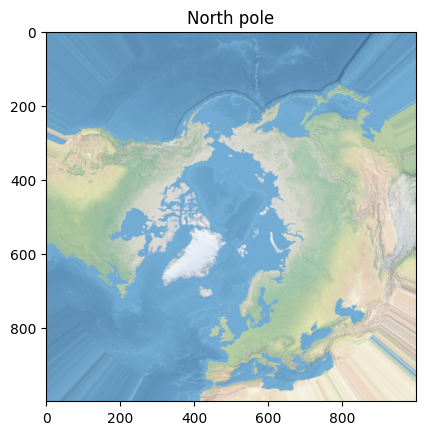

In [ ]:
image_rgb = np.dstack([r_resampled,g_resampled,b_resampled])

plt.imshow(image_rgb)
plt.title("North pole")
plt.show()

In [ ]:
from PIL import Image

img = Image.fromarray(image_rgb.astype(np.uint8))

In [ ]:
ds_disk = xr.open_dataset("ice_conc_nh_ease2-250_icdr-v3p0_202311211200.nc")

In [ ]:
ds_disk.attrs['time_coverage_start']

'2023-11-21T00:00:00Z'

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import glob

files = glob.glob("data_ice/*.nc")

In [ ]:
# for file in files:
#     ds_disk = xr.open_dataset(file)

#     out_plot = ds_disk['ice_conc'].plot()

#     fname = (f"out_ice/ice_"+ds_disk.attrs["time_coverage_start"]+".jpg").replace("T00:00:00Z","")

#     out_plot.figure.savefig(fname)

#     plt.close(out_plot.figure)

In [ ]:
# import cv2

# video_name = 'ice.webm'

# images = glob.glob("out_ice/*.jpg")
# frame = cv2.imread(images[0])
# height, width, layers = frame.shape

# fourcc = cv2.VideoWriter_fourcc(*'vp09')

# video = cv2.VideoWriter(video_name, fourcc, 30, (width,height))

# for image in images:
#     video.write(cv2.imread(image))

# cv2.destroyAllWindows()
# video.release()

In [ ]:
image_rgb = np.dstack([r_resampled,g_resampled,b_resampled])
scale = 6350

In [ ]:
for file in files:
    ds_disk = xr.open_dataset(file)

    ds_disk['ice_conc'].attrs["long_name"] = "Concentration of sea ice"

    out_plot = ds_disk['ice_conc'].where(ds_disk['ice_conc'] > 0).plot(cmap=plt.cm.Blues_r)

    scale = 6350
    plt.imshow(image_rgb,extent=(-scale,scale,-scale,scale))

    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)

    plt.title(str(ds_disk['ice_conc']['time'].values[0]).replace("T12:00:00.000000000",""))
    
    plt.imshow(image_rgb,extent=(-scale,scale,-scale,scale))
    
    fname = (f"out_ice/ice_"+ds_disk.attrs["time_coverage_start"]+".jpg").replace("T00:00:00Z","")

    out_plot.figure.savefig(fname)

    plt.close(out_plot.figure)

In [ ]:
import cv2

video_name = 'ice.webm'

images = glob.glob("out_ice/*.jpg")
frame = cv2.imread(images[0])
height, width, layers = frame.shape

fourcc = cv2.VideoWriter_fourcc(*'vp09')

video = cv2.VideoWriter(video_name, fourcc, 30, (width,height))

for image in images:
    video.write(cv2.imread(image))

cv2.destroyAllWindows()
video.release()

Text(0.5, 1.0, '2023-11-22')

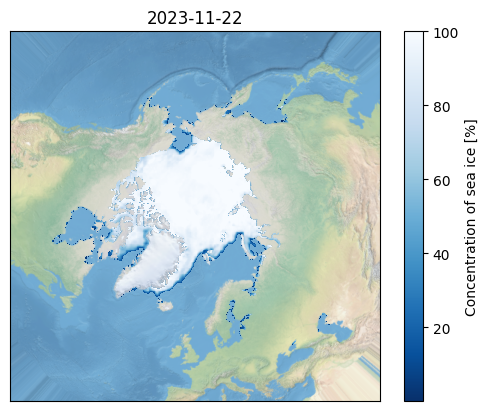

In [ ]:
ds_disk['ice_conc'].attrs["long_name"] = "Concentration of sea ice"

image_rgb = np.dstack([r_resampled,g_resampled,b_resampled])

out_plot = ds_disk['ice_conc'].where(ds_disk['ice_conc'] > 0).plot(cmap=plt.cm.Blues_r)

scale = 6350
plt.imshow(image_rgb,extent=(-scale,scale,-scale,scale))

#plt.axis('off')
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

plt.title(str(ds_disk['ice_conc']['time'].values[0]).replace("T12:00:00.000000000",""))



In [ ]:
plt.show()

ValueError: x and y can be no greater than 2D, but have shapes (1,) and (1, 432, 432)

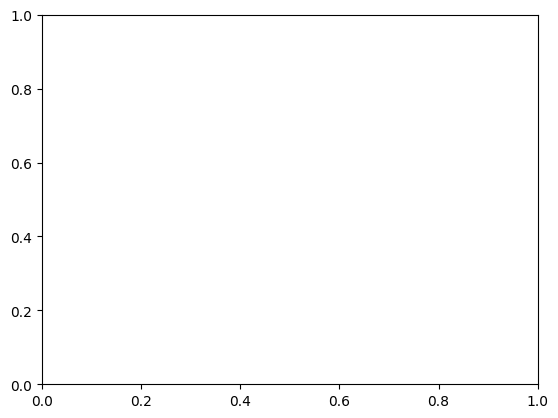

In [ ]:
plt.plot(ds_disk['ice_conc'])

In [ ]:
ds_disk

<xarray.Dataset>
Dimensions:                         (time: 1, nv: 2, xc: 432, yc: 432)
Coordinates:
  * time                            (time) datetime64[ns] 2023-11-21T12:00:00
  * xc                              (xc) float64 -5.388e+03 ... 5.388e+03
  * yc                              (yc) float64 5.388e+03 ... -5.388e+03
    lat                             (yc, xc) float32 16.62 16.82 ... 16.82 16.62
    lon                             (yc, xc) float32 -135.0 -135.1 ... 45.0
Dimensions without coordinates: nv
Data variables:
    Lambert_Azimuthal_Grid          int32 ...
    time_bnds                       (time, nv) datetime64[ns] ...
    ice_conc                        (time, yc, xc) float64 0.0 0.0 ... nan nan
    raw_ice_conc_values             (time, yc, xc) float64 ...
    total_standard_uncertainty      (time, yc, xc) float64 ...
    smearing_standard_uncertainty   (time, yc, xc) float64 ...
    algorithm_standard_uncertainty  (time, yc, xc) float64 ...
    status_flag                     (time, yc, xc) float32 ...
Attributes: (12/43)
    title:                     Interim Sea Ice Concentration Climate Data Rec...
    summary:                   This Interim Climate Data Record implements an...
    topiccategory:             Oceans ClimatologyMeteorologyAtmosphere
    keywords:                  GCMDSK:Earth Science > Cryosphere > Sea Ice > ...
    keywords_vocabulary:       GCMDSK:GCMD Science Keywords:https://gcmd.eart...
    geospatial_lat_min:        16.62393
    ...                        ...
    Conventions:               CF-1.7,ACDD-1.3
    standard_name_vocabulary:  CF Standard Name Table (Version 78, 21 Septemb...
    product_id:                osi-430-a
    product_name:              osi_saf_sea_ice_conc_climate_data_record_interim
    product_status:            operational
    doi:                       10.15770/EUM_SAF_OSI_0014

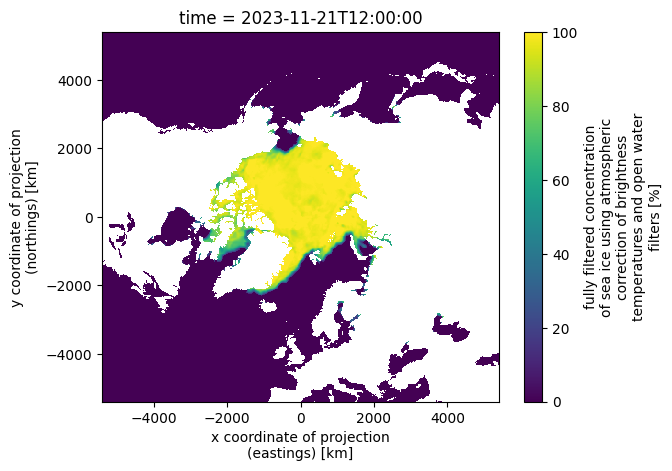

In [ ]:
p = ds_disk['ice_conc'].plot()

#plt.imshow([-2000,2000],[1000,1800])

In [ ]:
ds_disk

<xarray.Dataset>
Dimensions:                         (time: 1, nv: 2, xc: 432, yc: 432)
Coordinates:
  * time                            (time) datetime64[ns] 2023-11-21T12:00:00
  * xc                              (xc) float64 -5.388e+03 ... 5.388e+03
  * yc                              (yc) float64 5.388e+03 ... -5.388e+03
    lat                             (yc, xc) float32 ...
    lon                             (yc, xc) float32 ...
Dimensions without coordinates: nv
Data variables:
    Lambert_Azimuthal_Grid          int32 ...
    time_bnds                       (time, nv) datetime64[ns] ...
    ice_conc                        (time, yc, xc) float64 ...
    raw_ice_conc_values             (time, yc, xc) float64 ...
    total_standard_uncertainty      (time, yc, xc) float64 ...
    smearing_standard_uncertainty   (time, yc, xc) float64 ...
    algorithm_standard_uncertainty  (time, yc, xc) float64 ...
    status_flag                     (time, yc, xc) float32 ...
Attributes: (12/43)
    title:                     Interim Sea Ice Concentration Climate Data Rec...
    summary:                   This Interim Climate Data Record implements an...
    topiccategory:             Oceans ClimatologyMeteorologyAtmosphere
    keywords:                  GCMDSK:Earth Science > Cryosphere > Sea Ice > ...
    keywords_vocabulary:       GCMDSK:GCMD Science Keywords:https://gcmd.eart...
    geospatial_lat_min:        16.62393
    ...                        ...
    Conventions:               CF-1.7,ACDD-1.3
    standard_name_vocabulary:  CF Standard Name Table (Version 78, 21 Septemb...
    product_id:                osi-430-a
    product_name:              osi_saf_sea_ice_conc_climate_data_record_interim
    product_status:            operational
    doi:                       10.15770/EUM_SAF_OSI_0014

In [ ]:
from bokeh.io import output_notebook # enables plot interface in J notebook

output_notebook()

Loading BokehJS ...

In [ ]:
from PIL import Image

img_pil = Image.fromarray(image_rgb.astype(np.uint8))

In [ ]:
import numpy as np

from bokeh.plotting import figure, show

p = figure(width=500, height=500)

im = img_pil.convert("RGBA")
imarray = np.array(im)
imarray = imarray.view('uint32').reshape((imarray.shape[0], imarray.shape[1]))

# must give a vector of images
p.image_rgba(image=[imarray], x=0, y=0, dw=10, dh=10)
p.plot(ds_disk['ice_conc'],x=ds_disk['xc'],y=ds_disk['yc'])
show(p)

TypeError: 'figure' object is not callable